The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/29/6lrl9x8116gbhpm7v2lsh0lh0000gn/T/ipykernel_72149/1443508050.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  a1 = np.arctan(divpts2[i] / divpts1[i])
/var/folders/29/6lrl9x8116gbhpm7v2lsh0lh0000gn/T/ipykernel_72149/1443508050.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(x1, y1, 'ok',  color='red')


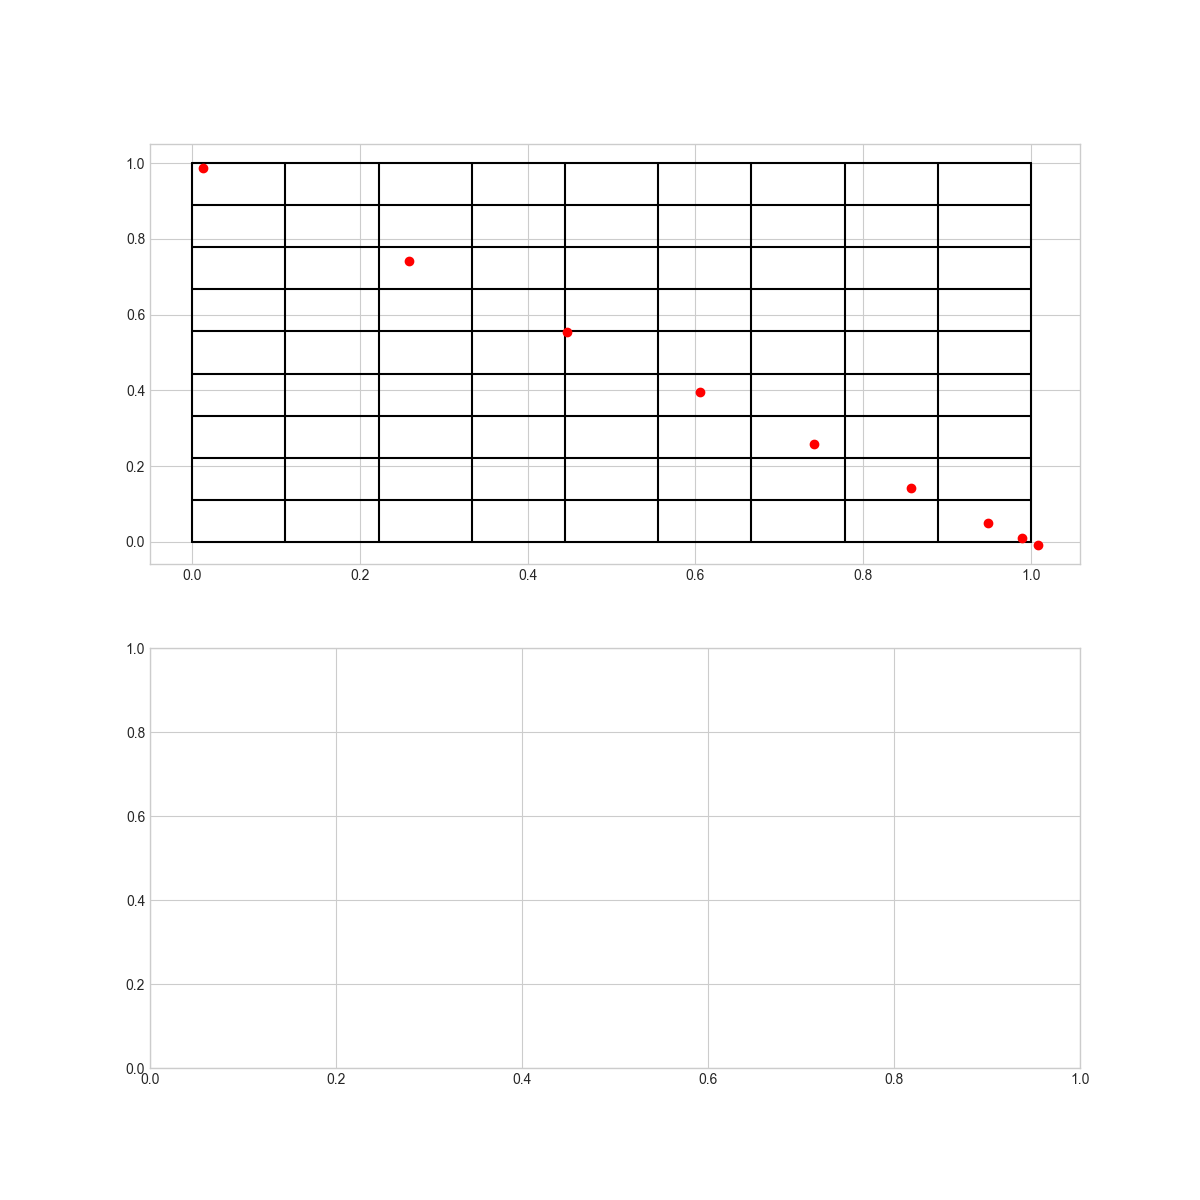

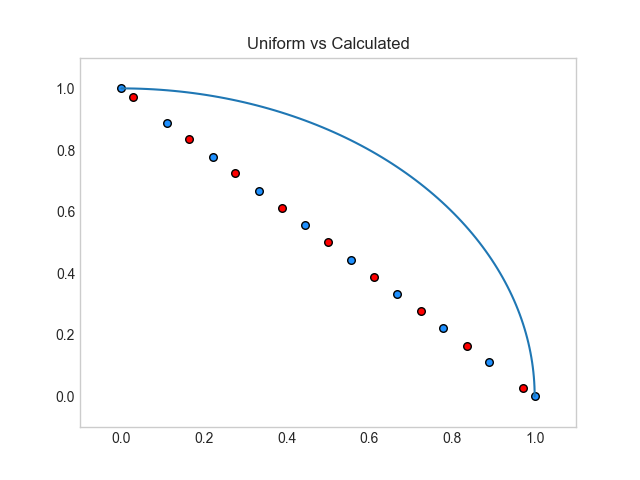

In [16]:
from random import uniform, random, shuffle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from mpl_toolkits import mplot3d

import methods as m
%matplotlib widget
%load_ext autoreload
%autoreload 2



epsilon = 10**(-2)
lowval = 10**(-6)

#p-loop
def equation(la, cumlen, curlen):
    # curmagnitude = 1    
    # cur = 0.0
    # while(abs(cur- ))
    vtop = la * np.sin((cumlen + curlen / 2) * np.pi)   
    vbot = np.sin(la / 2 * np.pi) 
    v = vtop / vbot
    # print(la, curlen, v)
    if(abs(v - curlen) < epsilon):
        return 0
    if(v < curlen):
        return 1
    return -1
def find_next_width(la, cumlen):
    low = lowval
    high = 1

    while(True):
        mid = (low+high) / 2
        v = equation(la, cumlen, mid)
        # print(mid, v)
        if(v == 0): return mid
        elif(v < 0): low = mid
        else: high = mid

def find_widths(N):
    # O(Log2(precision)^N)
    low = lowval
    high = 1
    while(True):
        mid = (low+high) / 2
        widths = [0] * N
        widths[0] = widths[-1] = mid
        cumlen = mid
        for i in range((N-1) // 2):
            v = find_next_width(mid, cumlen)
            cumlen += v
            j = i+1
            widths[j] = widths[N - 1 - j] = v
            if(cumlen > 1):
                break
        cumalitve = sum(widths)
        # print(cumalitve)
        if(abs(cumalitve - 1) > epsilon):
            if(cumalitve > 1):
                high = mid
            else:
                low = mid
        else:
            return widths

def circle_dis(pt1x, pt1y, pt2x, pt2y):
    arc_line_len = ((pt1x - pt2x)**2 + (pt1y - pt2y)**2)**(1/2)
    angle = 2 * np.arcsin((arc_line_len / 2) / 1)
    arc_length = (2 * np.pi * 1) * (angle / 360)
    return arc_length

def make_bins(N):
    uniform_size = 1 / (N-1)
    points = np.linspace(0, np.pi / 2, N)

    rpts = np.sin(points)**2
    rpts2 = np.cos(points)**2
    fig,ax=plt.subplots(2,1)
    fig.set_size_inches(12,12)
    # ax[0].axis('equal')
    diff = []
    ratio = []
    for i in range(len(rpts)-1):
        diff.append(round(rpts[i+1]-rpts[i], 3))
        ratio.append(1/(diff[i] / uniform_size))
    # rpts = rpts[:-1]
    for i in range(N-1):
        rpts[i] = uniform_size * i
    # rpts *= ratio
    # ax[0].plot(rpts, 1 - rpts, 'ok')
    for i in range(N):
        v = (uniform_size * i)
        ax[0].plot([v, v], [0, 1], color='black')
        ax[0].plot([0, 1], [v, v], color='black')
    
    divpts1 = rpts**(1/2)
    divpts2 = (1-rpts)**(1/2)

    pts2 = np.linspace(0, np.pi / 2, 100)
    

    


    map2 = m.draw2DPretty("Uniform vs Calculated", divpts1**2, divpts2**2, m.getmap2D())
    map2.plot(np.cos(pts2),np.sin(pts2))

    # ax[1].axis('equal')
    # ax[0].axis('equal')


    for i in range(len(divpts1) - 1):
        a1 = np.arctan(divpts2[i] / divpts1[i])
        a2 = np.arctan(divpts2[i+1] / divpts1[i+1])
        midpt = (a2+a1) / 2
        x = np.cos(midpt)**2
        y = np.sin(midpt)**2
        m.draw2DExtra(map2, x, y, 'red')

        tot_arc_len = circle_dis(divpts1[i], divpts2[i], divpts1[i+1], divpts2[i+1])
        pt_arc_len = circle_dis(divpts1[i], divpts2[i], x, y)

        porp = pt_arc_len / tot_arc_len
        x1 = (uniform_size * i + uniform_size * porp)
        y1 = (1- x1)
        # x1 = x**2
        # y1 = y**2
        ax[0].plot(x1, y1, 'ok',  color='red')
        # ax[0].plot(np.cos(divpts1[i])**2, np.sin(divpts2[i])**2, 'ok', color='green')






     


radius = 1
numcirclepts = 10
make_bins(numcirclepts)
# totalpts = numcirclepts
# pts = np.linspace(0, np.pi / 2 , numcirclepts)

# # print(find_widths(numcirclepts)) 

# rectpts= np.zeros([totalpts,2])
# molvals = np.zeros([totalpts,2])

# for i in range(numcirclepts):
#     rectpts[i, 0] = np.cos(pts[i])
#     rectpts[i, 1] = np.sin(pts[i])
#     # rectpts[i, 1] = np.sin(pts[i])*np.sin(pts[i])
    
#     # rectpts[i, 0] = (1/2 + (pts[i] - np.pi / 4))
#     # rectpts[i, 1] = (1/2 - (pts[i] - np.pi / 4))
    
#     molvals[i,0] = abs(rectpts[i,0]) **2
#     molvals[i,1] = abs(rectpts[i,1]) **2
    
# fig,ax=plt.subplots(5,1)
# fig.set_size_inches(12,12)
# ax[0].plot(rectpts[:,0], rectpts[:,1], 'ok')
# ax[0].axis('equal')
# ax[1].plot(molvals[:,0], molvals[:,1], 'ob')

# sqr_X = np.linspace(-1, 1, 20)
# # sqr_X = sqr_X[::-1]
# sqr_Y = np.linspace(-1, 1, 20)
# # print(xs)
# # ax[1].plot(sqr_X ** 2, (sqr_Y) ** 2, 'ob', color='red')
# ax[1].plot(sqr_X ** 2, (sqr_Y) ** 2, 'ob', color='red')

# for i in range(numcirclepts):
#     # ax[1].text(zs[ii, 0], zs[ii, 1] + 0.1, round( - xs[ii, 0] / xs[ii, 1],2))
#     # ax[1].text(molvals[i, 0], molvals[i, 1] + 0.2, round( -(1 - rectpts[i,0]**2)**(1/2)/ rectpts[i, 0], 2))
#     # ax[1].text(molvals[i, 0], molvals[i, 1] + 0.1, round( -rectpts[i,1] / rectpts[i, 0], 2))
#     ax[1].text(molvals[i, 0], molvals[i, 1] + 0.1, round(molvals[i,0], 2))
# # ax[2].set_ylim(-1,1)

# ax[2].hist(molvals[:,0], bins=50)
# ax[3].hist(molvals[:,1])
# plt.show()





    
    